## set up workspace

In [1]:
import warnings
from datetime import timedelta

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
sns.set_style('whitegrid')

from covid_model_deaths.preprocessing import expanding_moving_average_by_location
from covid_model_deaths.data import add_moving_average_rates

pd.options.display.max_rows = 99
pd.options.display.max_columns = 99
warnings.simplefilter('ignore')


## load data and smooth

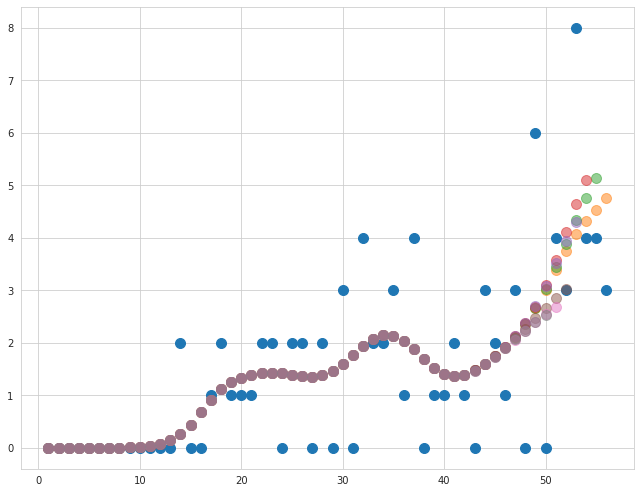

In [23]:
plot_loc = 526
df = pd.read_csv('/ihme/covid-19/model-inputs/best/full_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.loc[df['Death rate'] == 0, 'Death rate'] = 0.1 / df['population']
df['ln(death rate)'] = np.log(df['Death rate'])
df = df.loc[df['Country/Region'] == 'United States of America']
df = df.loc[df['location_id'] != 102]
df['location_id'] = df['location_id'].astype(int)
df['Location'] = df['Province/State']
df = df.loc[df['location_id'].isin([plot_loc, 561])].reset_index(drop=True)
df['min_date'] = df.groupby('location_id', as_index=False).Date.transform(min)
df['Days'] = df.apply(lambda x: (x['Date'] - x['min_date']).days, axis=1)
df['max_days'] = df.groupby('location_id', as_index=False).Days.transform(max)

plt.figure(figsize=(11, 8.5))
plt.scatter(df.loc[df['location_id'] == plot_loc, 'Days'][1:], 
            df.loc[df['location_id'] == plot_loc, 'Deaths'].values[1:] - \
            df.loc[df['location_id'] == plot_loc, 'Deaths'].values[:-1],
            s=100)
for n_drop in range(7):
    smooth_df = add_moving_average_rates(df.loc[df['Days'] <= df['max_days'] - n_drop], 'ln(death rate)', -np.inf, 10)
    smooth_df = smooth_df.loc[smooth_df['location_id'] == plot_loc]
    smooth_df['Deaths'] = np.exp(smooth_df['ln(death rate)']) * smooth_df['population']
    plt.scatter(smooth_df['Days'][1:], 
                smooth_df['Deaths'].values[1:] - smooth_df['Deaths'].values[:-1],
                s=100, alpha=0.5)
plt.show()


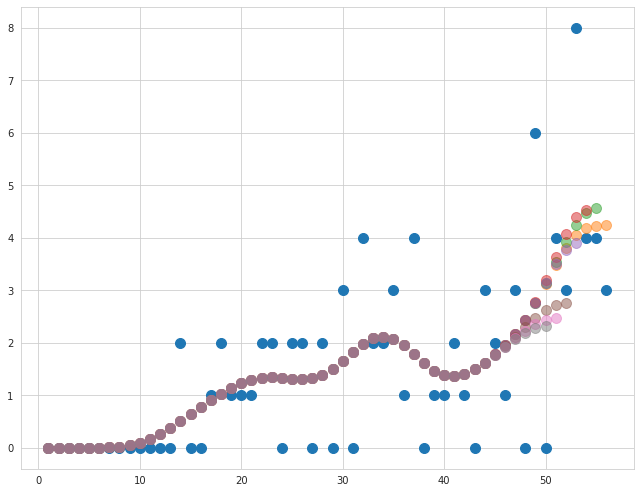

In [24]:
plot_loc = 526
df = pd.read_csv('/ihme/covid-19/model-inputs/best/full_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.loc[df['Death rate'] == 0, 'Death rate'] = 0.1 / df['population']
df['ln(death rate)'] = np.log(df['Death rate'])
df = df.loc[df['Country/Region'] == 'United States of America']
df = df.loc[df['location_id'] != 102]
df['location_id'] = df['location_id'].astype(int)
df['Location'] = df['Province/State']
df = df.loc[df['location_id'].isin([plot_loc, 555])].reset_index(drop=True)
df['min_date'] = df.groupby('location_id', as_index=False).Date.transform(min)
df['Days'] = df.apply(lambda x: (x['Date'] - x['min_date']).days, axis=1)
df['max_days'] = df.groupby('location_id', as_index=False).Days.transform(max)

plt.figure(figsize=(11, 8.5))
plt.scatter(df.loc[df['location_id'] == plot_loc, 'Days'][1:], 
            df.loc[df['location_id'] == plot_loc, 'Deaths'].values[1:] - \
            df.loc[df['location_id'] == plot_loc, 'Deaths'].values[:-1],
            s=100)
for n_drop in range(7):
    smooth_df = add_moving_average_rates(df.loc[df['Days'] <= df['max_days'] - n_drop], 'ln(death rate)', -np.inf, 10)
    smooth_df = smooth_df.loc[smooth_df['location_id'] == plot_loc]
    smooth_df['Deaths'] = np.exp(smooth_df['ln(death rate)']) * smooth_df['population']
    plt.scatter(smooth_df['Days'][1:], 
                smooth_df['Deaths'].values[1:] - smooth_df['Deaths'].values[:-1],
                s=100, alpha=0.5)
plt.show()


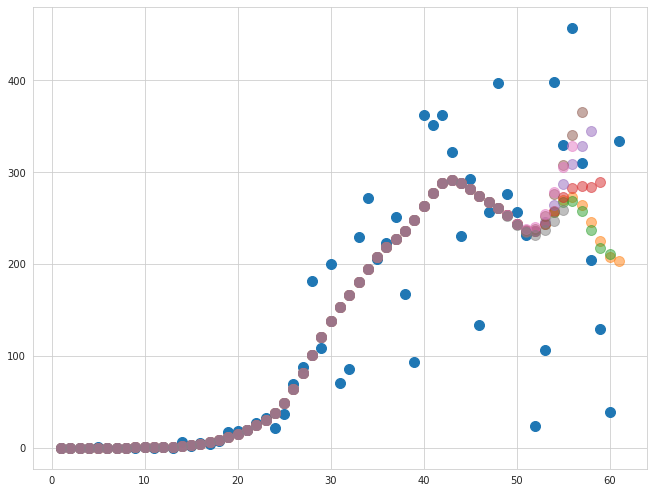

In [25]:
plot_loc = 553
df = pd.read_csv('/ihme/covid-19/model-inputs/best/full_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.loc[df['Death rate'] == 0, 'Death rate'] = 0.1 / df['population']
df['ln(death rate)'] = np.log(df['Death rate'])
df = df.loc[df['Country/Region'] == 'United States of America']
df = df.loc[df['location_id'] != 102]
df['location_id'] = df['location_id'].astype(int)
df['Location'] = df['Province/State']
df = df.loc[df['location_id'].isin([plot_loc, 555])].reset_index(drop=True)
df['min_date'] = df.groupby('location_id', as_index=False).Date.transform(min)
df['Days'] = df.apply(lambda x: (x['Date'] - x['min_date']).days, axis=1)
df['max_days'] = df.groupby('location_id', as_index=False).Days.transform(max)

plt.figure(figsize=(11, 8.5))
plt.scatter(df.loc[df['location_id'] == plot_loc, 'Days'][1:], 
            df.loc[df['location_id'] == plot_loc, 'Deaths'].values[1:] - \
            df.loc[df['location_id'] == plot_loc, 'Deaths'].values[:-1],
            s=100)
for n_drop in range(7):
    smooth_df = add_moving_average_rates(df.loc[df['Days'] <= df['max_days'] - n_drop], 'ln(death rate)', -np.inf, 10)
    smooth_df = smooth_df.loc[smooth_df['location_id'] == plot_loc]
    smooth_df['Deaths'] = np.exp(smooth_df['ln(death rate)']) * smooth_df['population']
    plt.scatter(smooth_df['Days'][1:], 
                smooth_df['Deaths'].values[1:] - smooth_df['Deaths'].values[:-1],
                s=100, alpha=0.5)
plt.show()
